<a href="https://colab.research.google.com/github/Gamearonx/Python-Basic/blob/main/NUMPY%2C_PANDAS%2C_MATPLOTLIB%2C_AND_SEABORN_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [30]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv("/content/drive/My Drive/PRE BOOT CAMP ASSIGNMENT/iris.csv")

# 1. Inspecting Dataset

In [34]:
# Inspect the dataset
print("First 5 rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

First 5 rows of the dataset:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   

# 2. Numpy Operation

In [36]:
# Step 2: NumPy Operations

# Create NumPy arrays
array_1d = np.array([1, 2, 3, 4, 5])
array_zeros = np.zeros((3, 3))
array_ones = np.ones((2, 2))
array_random = np.random.rand(3, 3)

# Element-wise operations
array_sum = array_1d + 10  # Add 10 to each element
array_square = array_1d ** 2  # Square each element

# Reshape and concatenate arrays
reshaped_array = np.arange(1, 10).reshape(3, 3)  # 3x3 matrix
horizontal_stack = np.hstack((reshaped_array, array_random))  # Horizontal concatenation
vertical_stack = np.vstack((reshaped_array, array_random))  # Vertical concatenation

(array_1d, array_zeros, array_ones, array_random, array_sum, array_square, reshaped_array, horizontal_stack, vertical_stack)


(array([1, 2, 3, 4, 5]),
 array([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]),
 array([[1., 1.],
        [1., 1.]]),
 array([[0.46664095, 0.56703438, 0.46138201],
        [0.56476492, 0.55884971, 0.44387635],
        [0.15451337, 0.90497846, 0.99582651]]),
 array([11, 12, 13, 14, 15]),
 array([ 1,  4,  9, 16, 25]),
 array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 array([[1.        , 2.        , 3.        , 0.46664095, 0.56703438,
         0.46138201],
        [4.        , 5.        , 6.        , 0.56476492, 0.55884971,
         0.44387635],
        [7.        , 8.        , 9.        , 0.15451337, 0.90497846,
         0.99582651]]),
 array([[1.        , 2.        , 3.        ],
        [4.        , 5.        , 6.        ],
        [7.        , 8.        , 9.        ],
        [0.46664095, 0.56703438, 0.46138201],
        [0.56476492, 0.55884971, 0.44387635],
        [0.15451337, 0.90497846, 0.99582651]]))

# 2. DF Manipulation

In [37]:
# Step 3: Pandas DataFrame Manipulation

# Select specific columns
selected_columns = df[['sepal_length', 'sepal_width']]

# Filter rows where sepal length is greater than 5.5
filtered_rows = df[df['sepal_length'] > 5.5]

# Group data by species and compute mean values
grouped_data = df.groupby('species').mean()

# Check for missing values and handle them (though this dataset has no missing values)
missing_values = df.isnull().sum()
df_cleaned = df.dropna()  # Drop rows with missing values

(selected_columns.head(), filtered_rows.head(), grouped_data, missing_values)


(   sepal_length  sepal_width
 0           5.1          3.5
 1           4.9          3.0
 2           4.7          3.2
 3           4.6          3.1
 4           5.0          3.6,
     sepal_length  sepal_width  petal_length  petal_width     species
 14           5.8          4.0           1.2          0.2      setosa
 15           5.7          4.4           1.5          0.4      setosa
 18           5.7          3.8           1.7          0.3      setosa
 50           7.0          3.2           4.7          1.4  versicolor
 51           6.4          3.2           4.5          1.5  versicolor,
             sepal_length  sepal_width  petal_length  petal_width
 species                                                         
 setosa             5.006        3.418         1.464        0.244
 versicolor         5.936        2.770         4.260        1.326
 virginica          6.588        2.974         5.552        2.026,
 sepal_length    0
 sepal_width     0
 petal_length    0
 petal_wid

# 3. Data Preprocessing & Transformation

In [38]:
# Step 4: Data Preprocessing & Transformation

# Normalize numerical columns (Min-Max Scaling)
df_normalized = df.copy()
for col in ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']:
    df_normalized[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

# Apply log transformation to petal_length (to reduce skewness)
df_log_transformed = df.copy()
df_log_transformed['petal_length'] = np.log(df['petal_length'] + 1)  # Adding 1 to avoid log(0)

# Convert categorical variable 'species' into numerical format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['species'])

(df_normalized.head(), df_log_transformed.head(), df_encoded.head())


(   sepal_length  sepal_width  petal_length  petal_width species
 0      0.222222     0.625000      0.067797     0.041667  setosa
 1      0.166667     0.416667      0.067797     0.041667  setosa
 2      0.111111     0.500000      0.050847     0.041667  setosa
 3      0.083333     0.458333      0.084746     0.041667  setosa
 4      0.194444     0.666667      0.067797     0.041667  setosa,
    sepal_length  sepal_width  petal_length  petal_width species
 0           5.1          3.5      0.875469          0.2  setosa
 1           4.9          3.0      0.875469          0.2  setosa
 2           4.7          3.2      0.832909          0.2  setosa
 3           4.6          3.1      0.916291          0.2  setosa
 4           5.0          3.6      0.875469          0.2  setosa,
    sepal_length  sepal_width  petal_length  petal_width  species_setosa  \
 0           5.1          3.5           1.4          0.2            True   
 1           4.9          3.0           1.4          0.2          

# 4: Data Visualization

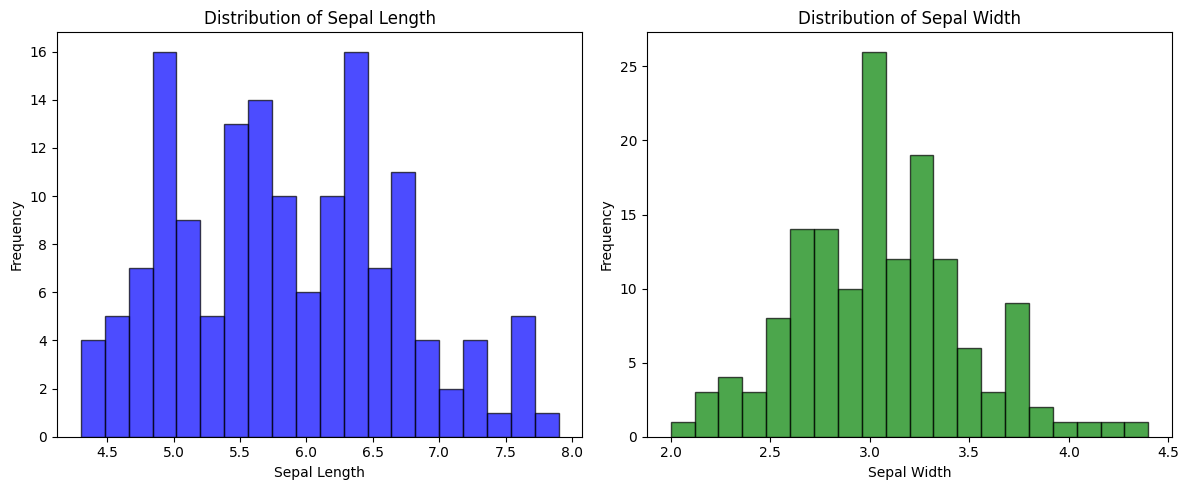

In [43]:

# Histogram
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['sepal_length'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Length')

plt.subplot(1, 2, 2)
plt.hist(df['sepal_width'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Distribution of Sepal Width')

plt.tight_layout()
plt.show()

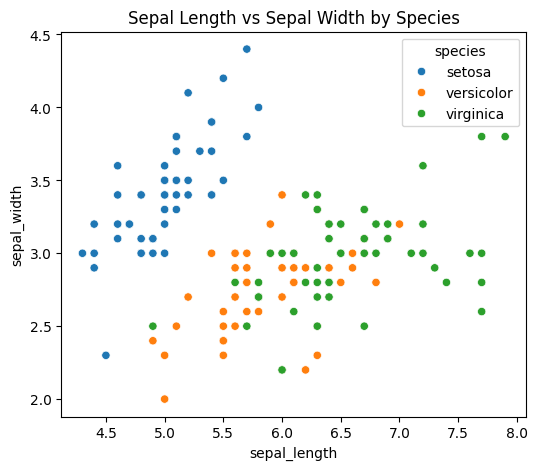

In [44]:
# Scatter plot
plt.figure(figsize=(6, 5))
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df)
plt.title('Sepal Length vs Sepal Width by Species')
plt.show()

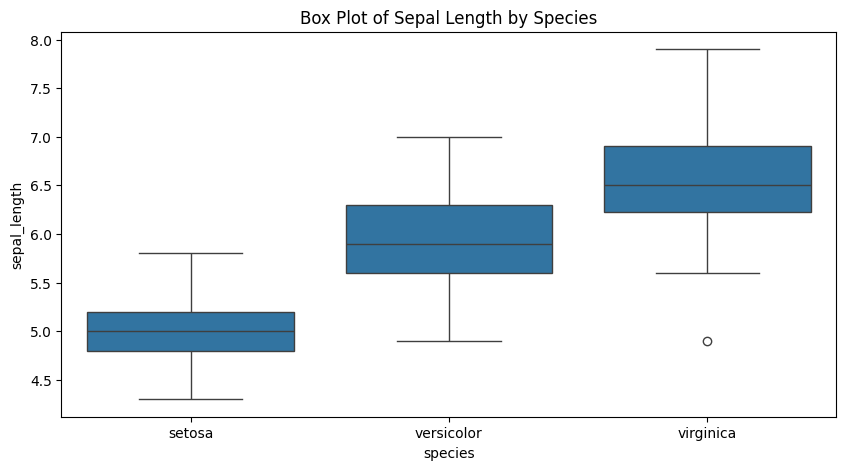

In [45]:
# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='species', y='sepal_length', data=df)
plt.title('Box Plot of Sepal Length by Species')
plt.show()

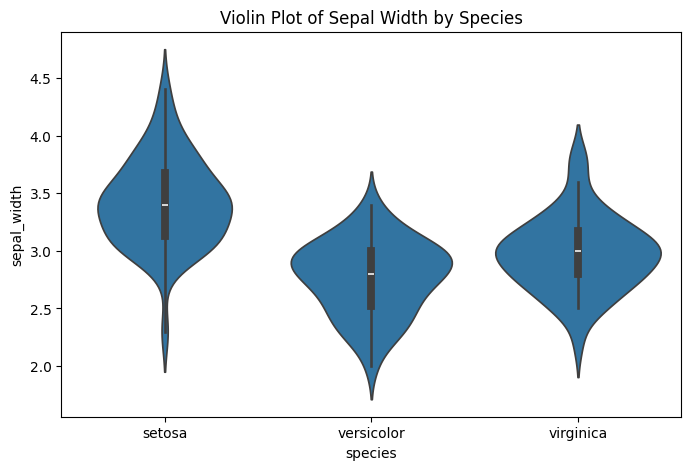

In [47]:
# Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(x='species', y='sepal_width', data=df)
plt.title('Violin Plot of Sepal Width by Species')
plt.show()

# 5: Fine-tuning and Optimization

In [48]:
# Convert float64 columns to float32 to reduce memory usage
df_optimized = df.copy()
df_optimized[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] = df_optimized[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].astype('float32')

# Check memory usage before and after optimization
memory_before = df.memory_usage(deep=True).sum()
memory_after = df_optimized.memory_usage(deep=True).sum()

(memory_before, memory_after)


(np.int64(14732), np.int64(12332))